In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_rating = pd.read_csv('/content/drive/MyDrive/Books/Ratings.csv')
df_books = pd.read_csv('/content/drive/MyDrive/Books/Books.csv')
df_users = pd.read_csv('/content/drive/MyDrive/Books/Users.csv')
df_books.head()
# df_rating.head()
# df_users.head()

<ipython-input-3-398e4bc70d4a>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('/content/drive/MyDrive/Books/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df_images = df_books.iloc[:, -2:]
df_books = df_books.iloc[:, :-2]
# df_images.head()
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
userCounts = df_rating['User-ID'].value_counts()
isbnCounts = df_rating['ISBN'].value_counts()
print(isbnCounts)

0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: ISBN, Length: 340556, dtype: int64


In [ ]:
len(df_rating['User-ID'].unique())

105283

In [ ]:
dfr = df_rating
dfr = dfr[~dfr['ISBN'].isin(isbnCounts[isbnCounts < 100].index)]

dfr = pd.merge(right=dfr, left = df_books, on="ISBN")
dfr.head()
dfr = dfr[~dfr['User-ID'].isin(userCounts[userCounts < 200].index)]
dfr = dfr.drop_duplicates(["Book-Title", "User-ID"])

In [ ]:
combine_book_rating = dfr
columns = ['Year-Of-Publication', 'Book-Author', 'Image-URL-S', 'Publisher']
combine_book_rating =  combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,ISBN,Book-Title,User-ID,Book-Rating
0,0440234743,The Testament,277478,0
5,0440234743,The Testament,2977,0
7,0440234743,The Testament,3363,0
10,0440234743,The Testament,7346,9
14,0440234743,The Testament,9856,0


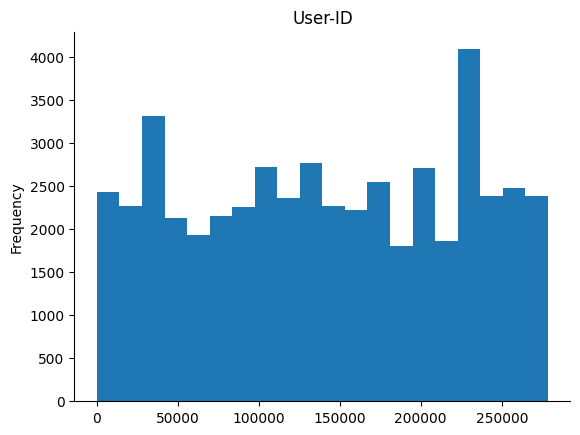

In [ ]:
# @title User-ID

from matplotlib import pyplot as plt
combine_book_rating['User-ID'].plot(kind='hist', bins=20, title='User-ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_for_nn = combine_book_rating
combine_book_rating.shape[0]

49136

Importing modules required to build and train Neural Network using the library 'TensorFlow' and the API 'Keras' which is in-built to TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Concatenate, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

Assigning unique BookIDs for each unique book in the dataframe:

In [ ]:
unique_books = df_for_nn['Book-Title'].unique()
book_id_mapping = {book_title: book_id for book_id, book_title in enumerate(unique_books, start=1)}

df_for_nn['Book-ID'] = df_for_nn['Book-Title'].map(book_id_mapping)

df_for_nn

,ISBN,Book-Title,User-ID,Book-Rating,Book-ID
0,0440234743,The Testament,277478,0,1
5,0440234743,The Testament,2977,0,1
7,0440234743,The Testament,3363,0,1
10,0440234743,The Testament,7346,9,1
14,0440234743,The Testament,9856,0,1
...,...,...,...,...,...
137411,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,236283,0,673
137416,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,251613,0,673
137417,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,252071,0,673
137420,0515135739,Eleventh Hour: An FBI Thriller (FBI Thriller (...,256407,0,673


Splitting the dataset into trainset and test set.

In [ ]:
train, test = train_test_split(df_for_nn, test_size=0.2, random_state=42)
n_users = len(df_for_nn['User-ID'].unique())
n_books = len(df_for_nn['Book-ID'].unique())
print(n_users)
print(n_books)

888
673


In [ ]:
print(len(df_for_nn['User-ID'].unique())+1)
print(df_for_nn['User-ID'].max())
print(df_for_nn['Book-ID'].max())

889
278418
673


Defining embedding based Neural Network

In [ ]:
# Define input layers
user_input = Input(shape=[1], name='User-Input')
book_input = Input(shape=[1], name='Book-Input')

user_embedding = Embedding(278419, 5, name="User-Embedding")(user_input)
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)

book_vec = Flatten(name="Flatten-Books")(book_embedding)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [ ]:
history = model.fit([train['User-ID'], train['Book-ID']], train['Book-Rating'], epochs=50, verbose=1)

Epoch 1/50
1229/1229 [==============================] - 19s 15ms/step - loss: 16.7521
Epoch 2/50
1229/1229 [==============================] - 20s 16ms/step - loss: 16.2524
Epoch 3/50
1229/1229 [==============================] - 19s 16ms/step - loss: 14.8587
Epoch 4/50
 836/1229 [===================>..........] - ETA: 6s - loss: 13.5813

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Neural Network/model(Final)', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('/content/drive/MyDrive/Neural Network/model(Final)', 'rb') as file:
    model = pickle.load(file)

In [ ]:
#Visualizing Embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

<Axes: >

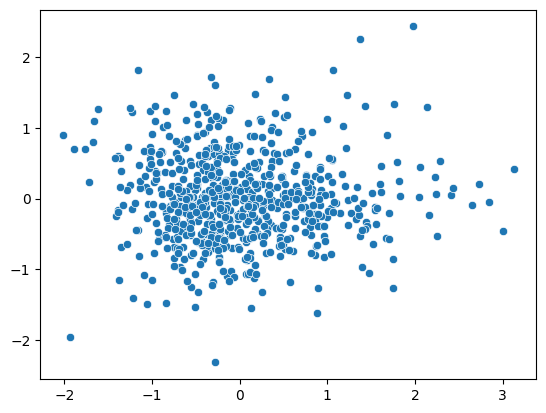

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
# Evaluate the model
mse = model.evaluate([test['User-ID'], test['Book-ID']], test['Book-Rating'], verbose=0)
print("Mean Squared Error (MSE) on test set:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) on test set:", rmse)

Mean Squared Error (MSE) on test set: 11.673409461975098
Root Mean Squared Error (RMSE) on test set: 3.416637156909568


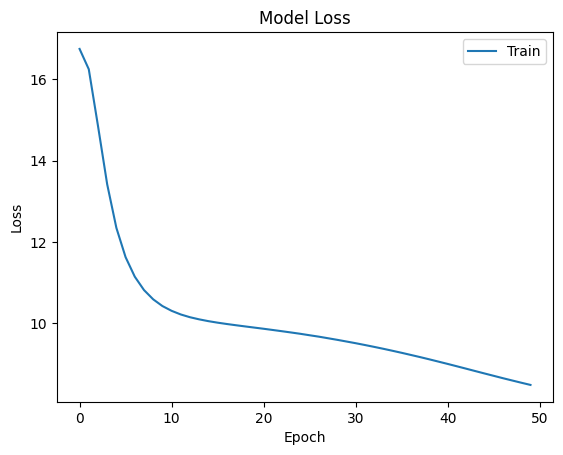

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
book_data = np.array(list(set(df_for_nn['Book-ID'])))
user = np.array([1 for i in range(len(book_data))])
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:5]
print(recommended_book_ids)
print(predictions[recommended_book_ids])
output_df=df_for_nn[df_for_nn['Book-ID'].isin(recommended_book_ids)]
book_titles = output_df['Book-Title'].values
print(set(book_titles.tolist()))

22/22 [==============================] - 0s 1ms/step
[187 341 672 477 467]
[0.04721591 0.04042874 0.0364534  0.02915845 0.01532891]
{'A Civil Action', 'The Runaway Jury', 'Midnight in the Garden of Good and Evil', 'The Dark Half', 'Angels'}
